# ROS Package

ROS: melodic, currently we are using python 2 with melodic.

## Setup

This will take a couple minutes

In [1]:
#@title Install ROS {display-mode: "form"}
!sudo sh -c 'echo "deb http://packages.ros.org/ros/ubuntu $(lsb_release -sc) main" > /etc/apt/sources.list.d/ros-latest.list'
!sudo apt-key adv --keyserver 'hkp://keyserver.ubuntu.com:80' --recv-key C1CF6E31E6BADE8868B172B4F42ED6FBAB17C654
!sudo apt update
!sudo apt install ros-melodic-ros-base

Executing: /tmp/apt-key-gpghome.oSaSCIaPka/gpg.1.sh --keyserver hkp://keyserver.ubuntu.com:80 --recv-key C1CF6E31E6BADE8868B172B4F42ED6FBAB17C654
gpg: key F42ED6FBAB17C654: public key "Open Robotics <info@osrfoundation.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:5 http://packages.ros.org/ros/ubuntu bionic InRelease [4,680 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubunt

### Setup Python Path

So that we could use rospy, rosbag etc in the notebook.

In [2]:
#@title setup python path {display-mode: "form"}
import sys
import os

sys.path.append('/opt/ros/melodic/lib/python2.7/dist-packages/')
#sys.path.append('/opt/ros/melodic/lib/python3.6/dist-packages/')
print(sys.path)

os.environ['PATH'] += ':/opt/ros/melodic/bin'
print(os.environ['PATH'])

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/opt/ros/melodic/lib/python2.7/dist-packages/']
/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/ros/melodic/bin


In [3]:
!sudo apt install ros-melodic-cv-bridge ros-melodic-ros-numpy
!sudo apt install python-catkin-tools
!sudo apt install python-rosdep python-rosinstall python-rosinstall-generator python-wstool build-essential
!sudo apt install ros-melodic-rosbridge-server
!sudo apt install python-rospkg
!pip install rospkg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  python-opencv ros-melodic-tf ros-melodic-tf2 ros-melodic-tf2-msgs
  ros-melodic-tf2-py ros-melodic-tf2-ros
The following NEW packages will be installed:
  python-opencv ros-melodic-cv-bridge ros-melodic-ros-numpy ros-melodic-tf
  ros-melodic-tf2 ros-melodic-tf2-msgs ros-melodic-tf2-py ros-melodic-tf2-ros
0 upgraded, 8 newly installed, 0 to remove and 64 not upgraded.
Need to get 1,249 kB of archives.
After this operation, 6,878 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [535 kB]
Get:2 http://packages.ros.org/ros/ubuntu bionic/main amd64 ros-melodic-tf2-msgs amd64 0.6.5-0bionic.20210505.012524

This will create a **my_package** folder which contains a **package.xml** and a **CMakeLists.txt**, which have been partially filled out with the information we gave catkin_create_pkg.

## A. Catkin Workspace

Catkin workspace can help us organize one or more (ROS) packages.
Essentially catkin workspace use CMake build system for building software packages. Any CMake-compliant package contains one or more CMakeLists.txt file that describe how to build the code and where to install it to. 

References:
* http://wiki.ros.org/catkin/Tutorials/create_a_workspace 
* http://wiki.ros.org/catkin/CMakeLists.txt

In [4]:
!mkdir -p /content/catkin_ws/src
%cd /content/catkin_ws
!source /opt/ros/melodic/setup.bash && catkin_make

/content/catkin_ws
Base path: /content/catkin_ws
Source space: /content/catkin_ws/src
Build space: /content/catkin_ws/build
Devel space: /content/catkin_ws/devel
Install space: /content/catkin_ws/install
Creating symlink "/content/catkin_ws/src/CMakeLists.txt" pointing to "/opt/ros/melodic/share/catkin/cmake/toplevel.cmake"
####
#### Running command: "cmake /content/catkin_ws/src -DCATKIN_DEVEL_PREFIX=/content/catkin_ws/devel -DCMAKE_INSTALL_PREFIX=/content/catkin_ws/install -G Unix Makefiles" in "/content/catkin_ws/build"
####
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compile

After running catkin_make, you will expected to see a build and a devel folder under catkin_ws.

### Environment Steup

We have seen that we need to source /opt/ros/melodic/setup.bash in a command. To use the packages we have in the catkin_ws, we could do it by sourcing /content/catkin_ws/devel/setup.bash. This will also automatically source /opt/ros/melodic/setup.bash for us.

In [5]:
!source /content/catkin_ws/devel/setup.bash

Sometimes if you have a large project with more than one catkin workspace, we could setup a environment.sh

In [6]:
%%writefile /content/environment.sh

source /opt/ros/melodic/setup.bash 
source /content/catkin_ws/devel/setup.bash

Writing /content/environment.sh


In [7]:
%cd /content/
!source environment.sh

/content


## B. ROS package
Package contains our nodes, launch files, some libraries, etc. ROS will first find the package in the package list and then find the files in your package to run.


### 1. catkin_create_pkg

We can create the template package by use the catkin_create_pkg script

**!catkin_create_pkg <package_name> [depend1] [depend2] [depend3]** 

at the folder which locates at /catkin_ws/src. 


In [8]:
%cd /content/catkin_ws/src
!source /content/environment.sh && catkin_create_pkg rospackage_first_example roscpp rospy

/content/catkin_ws/src
Created file rospackage_first_example/package.xml
Created file rospackage_first_example/CMakeLists.txt
Created folder rospackage_first_example/include/rospackage_first_example
Created folder rospackage_first_example/src
Successfully created files in /content/catkin_ws/src/rospackage_first_example. Please adjust the values in package.xml.


In [9]:
%cd /content/catkin_ws/
!source /content/environment.sh && catkin_make

/content/catkin_ws
Base path: /content/catkin_ws
Source space: /content/catkin_ws/src
Build space: /content/catkin_ws/build
Devel space: /content/catkin_ws/devel
Install space: /content/catkin_ws/install
####
#### Running command: "cmake /content/catkin_ws/src -DCATKIN_DEVEL_PREFIX=/content/catkin_ws/devel -DCMAKE_INSTALL_PREFIX=/content/catkin_ws/install -G Unix Makefiles" in "/content/catkin_ws/build"
####
-- Using CATKIN_DEVEL_PREFIX: /content/catkin_ws/devel
-- Using CMAKE_PREFIX_PATH: /content/catkin_ws/devel;/opt/ros/melodic
-- This workspace overlays: /content/catkin_ws/devel;/opt/ros/melodic
-- Found PythonInterp: /usr/bin/python2 (found suitable version "2.7.17", minimum required is "2") 
-- Using PYTHON_EXECUTABLE: /usr/bin/python2
-- Using Debian Python package layout
-- Using empy: /usr/bin/empy
-- Using CATKIN_ENABLE_TESTING: ON
-- Call enable_testing()
-- Using CATKIN_TEST_RESULTS_DIR: /content/catkin_ws/build/test_results
-- Found gtest sources under '/usr/src/googletest

In [10]:
%cd /content/catkin_ws
!source /content/environment.sh && rospack find rospackage_first_example

/content/catkin_ws
/content/catkin_ws/src/rospackage_first_example


### 2. Clone an example ROS package from Github

This package includes ros service and customized ros message.


In [11]:
%cd /content/catkin_ws/src/
#!rm -rf rospackage_example # remove if needed 
!git clone https://github.com/Sensing-Intelligent-System/rospackage_example.git

/content/catkin_ws/src
Cloning into 'rospackage_example'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 70 (delta 35), reused 36 (delta 13), pack-reused 0
Unpacking objects: 100% (70/70), done.


Then, we need to build the packages in the catkin workspace.

In [12]:
%cd /content/catkin_ws
!source /content/environment.sh && catkin_make

/content/catkin_ws
Base path: /content/catkin_ws
Source space: /content/catkin_ws/src
Build space: /content/catkin_ws/build
Devel space: /content/catkin_ws/devel
Install space: /content/catkin_ws/install
####
#### Running command: "cmake /content/catkin_ws/src -DCATKIN_DEVEL_PREFIX=/content/catkin_ws/devel -DCMAKE_INSTALL_PREFIX=/content/catkin_ws/install -G Unix Makefiles" in "/content/catkin_ws/build"
####
-- Using CATKIN_DEVEL_PREFIX: /content/catkin_ws/devel
-- Using CMAKE_PREFIX_PATH: /content/catkin_ws/devel;/opt/ros/melodic
-- This workspace overlays: /content/catkin_ws/devel;/opt/ros/melodic
-- Found PythonInterp: /usr/bin/python2 (found suitable version "2.7.17", minimum required is "2") 
-- Using PYTHON_EXECUTABLE: /usr/bin/python2
-- Using Debian Python package layout
-- Using empy: /usr/bin/empy
-- Using CATKIN_ENABLE_TESTING: ON
-- Call enable_testing()
-- Using CATKIN_TEST_RESULTS_DIR: /content/catkin_ws/build/test_results
-- Found gtest sources under '/usr/src/googletest

In [13]:
%cd /content/catkin_ws
!source /content/environment.sh && rospack find rospackage_example

/content/catkin_ws
/content/catkin_ws/src/rospackage_example


## C. ROS Launch

**roslaunch** is a tool for easily launching multiple ROS nodes locally and remotely via SSH, as well as setting parameters on the Parameter Server. It includes options to automatically respawn processes that have already died. roslaunch takes in one or more XML configuration files (with the .launch extension) that specify the parameters to set and nodes to launch, as well as the machines that they should be run on.

Launch files allow us to run multiple files, dependencies, and ROS master in one command. All the launch file will be written in xml format.


### launch file

In [14]:
!cat /content/catkin_ws/src/rospackage_example/launch/launch_package.launch

<launch>

    <node name="talker" pkg="rospackage_example" type="talker.py" />
    <node name="listener" pkg="rospackage_example" type="listener.py" />

</launch>


roslaunch will automatically start a roscore. In this exmaple, it will run talker and listener. In Colab we need to make the python files runnable.

In [15]:
!chmod +x /content/catkin_ws/src/rospackage_example/src/*.py 

In [16]:
import time
get_ipython().system_raw('source /opt/ros/melodic/setup.bash && roscore & ') 
time.sleep(3)
get_ipython().system_raw('source /content/environment.sh  && roslaunch rospackage_example launch_package.launch & ') 
time.sleep(3)

In [17]:
!source /content/environment.sh && rosnode list

/listener
/rosout
/talker


In [18]:
!source /content/environment.sh && rostopic list

/commands
/greeting
/rosout
/rosout_agg


In [19]:
%cd /content/
!ls
!chmod +x /content/catkin_ws/src/rospackage_example/src/add_two_ints_server.py
!echo ""
!source /content/environment.sh && printenv | grep ROS
# !source /content/environment.sh && roscd rospackage_example
# !ls
# !echo ""
# !source /content/catkin_ws/devel/setup.bash && rosrun rospackage_example add_two_ints_server

/content
catkin_ws  environment.sh  sample_data

ROS_ETC_DIR=/opt/ros/melodic/etc/ros
ROS_ROOT=/opt/ros/melodic/share/ros
ROS_MASTER_URI=http://localhost:11311
ROS_VERSION=1
ROS_PYTHON_VERSION=2
ROS_PACKAGE_PATH=/content/catkin_ws/src:/opt/ros/melodic/share
ROSLISP_PACKAGE_DIRECTORIES=/content/catkin_ws/devel/share/common-lisp
ROS_DISTRO=melodic


### remap

Remapping allows you to "trick" a ROS node so that when it thinks it is subscribing to or publishing to /some_topic it is actually subscribing to or publishing to /some_other_topic

```
<remap from="/different_topic" to="/needed_topic"/>
```


In [20]:
!cat /content/catkin_ws/src/rospackage_example/launch/launch_remap.launch

<launch>

    <node name="talker" pkg="rospackage_example" type="talker.py" />
  
    <node name="listener_remap" pkg="rospackage_example" type="listener.py">
        <remap from="hello" to="/greeting" />
    </node>

</launch>


In [21]:
get_ipython().system_raw('source /content/environment.sh  && roslaunch rospackage_example launch_remap.launch & ') 
time.sleep(3)

In [22]:
!source /content/environment.sh && rosnode list

/listener
/listener_remap
/rosout
/talker


In [23]:
!source /content/environment.sh && rostopic list

/commands
/greeting
/rosout
/rosout_agg


## D. ROS Service

See ROS service vs. topic comparisons. http://wiki.ros.org/ROS/Patterns/Communication

### Define your service type, 

The .srv file consists of a request and a response msg type, separated by '- - -'.


In [24]:
!cat /content/catkin_ws/src/rospackage_example/srv/AddTwoInts.srv

int64 a
int64 b
---
int64 sum

### CMakeList.txt

In [25]:
!cat /content/catkin_ws/src/rospackage_example/CMakeLists.txt

cmake_minimum_required(VERSION 3.0.2)
project(rospackage_example)

## Compile as C++11, supported in ROS Kinetic and newer
# add_compile_options(-std=c++11)

## Find catkin macros and libraries
## if COMPONENTS list like find_package(catkin REQUIRED COMPONENTS xyz)
## is used, also find other catkin packages
find_package(catkin REQUIRED COMPONENTS
  roscpp
  rospy
  message_generation ## here
)

## System dependencies are found with CMake's conventions
# find_package(Boost REQUIRED COMPONENTS system)


## Uncomment this if the package has a setup.py. This macro ensures
## modules and global scripts declared therein get installed
## See http://ros.org/doc/api/catkin/html/user_guide/setup_dot_py.html
# catkin_python_setup()

################################################
## Declare ROS messages, services and actions ##
################################################

## To declare and build messages, services or actions from within this
## package, follow these steps:
## * Let MSG_DEP

### rossrv list

In [26]:
!source /content/environment.sh && rossrv list |grep AddTwoInts

rospackage_example/AddTwoInts


### Server

In [27]:
!cat /content/catkin_ws/src/rospackage_example/src/add_two_ints_server.py

#!/usr/bin/env python

from rospackage_example.srv import AddTwoInts, AddTwoIntsResponse
import rospy

def handle_add_two_ints(req):
  print("Returning [%s + %s = %s]" %(req.a, req.b, (req.a + req.b)))
  return AddTwoIntsResponse(req.a + req.b)

def add_two_ints_server():
  rospy.init_node('add_two_ints_server')
  s = rospy.Service('add_two_ints', AddTwoInts, handle_add_two_ints)
  print("Ready to add two ints.")
  rospy.spin()

if __name__ == "__main__":
  add_two_ints_server()


Start the server

In [28]:
get_ipython().system_raw('source /content/environment.sh && rosrun rospackage_example add_two_ints_server.py & ')

### rosservice call

In [29]:
!source /content/environment.sh && rosservice call /add_two_ints 9 10 

ERROR: Service [/add_two_ints] is not available.


## E. ROS Diagram

It is important to document the nodes, messages etc, especially when the system goes larger or more complex.

### graphviz

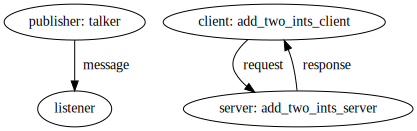

In [30]:
from graphviz import Digraph, Graph
dot = Digraph(comment='RosDiagram') # pdf


dot.node('Pub', label = 'publisher: talker')
dot.node('Sub', label = 'listener')

dot.node('Client', label = 'client: add_two_ints_client') 
dot.node('Server', label = 'server: add_two_ints_server') 


dot.edge("Pub", "Sub", label = "  message  ")

dot.edge("Client", "Server", label = "  request  ")
dot.edge("Server", "Client", label = "  response  ")


dot

  

Write to a file.

In [31]:
dot.format = 'png'
dot.render('/content/catkin_ws/img/diagram', view=True)

'/content/catkin_ws/img/diagram.png'